# 07 - Pandas, Multiple Tables, and Tidy Data

In [1]:
# Includes and Standard Magic...
### Standard Magic and startup initializers.

# Load Numpy
import numpy as np
# Load MatPlotLib
import matplotlib
import matplotlib.pyplot as plt
# Load Pandas
import pandas as pd

# This lets us show plots inline and also save PDF plots if we want them
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
matplotlib.style.use('fivethirtyeight')

# These two things are for Pandas, it widens the notebook and lets us display data easily.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Show a ludicrus number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

First, let's take a look at some basic Pandas functionality

In [2]:
s1 = pd.DataFrame([0.3, 0.8, 0.1, 4.0, 1.2], 
                  index = ['a', 'c', 'd', 'e', 'f'], 
                  columns=['data'])

display(s1)

,data
a,0.3
c,0.8
d,0.1
e,4.0
f,1.2


In [3]:
s2 = pd.DataFrame([0.9, 0.1, 4.8, 0.3], 
                  index = ['b', 'c', 'd', 'g'], 
                  columns=['data'])
display(s2)

,data
b,0.9
c,0.1
d,4.8
g,0.3


Re-index can get used to do some funky things or make bigger frames.. [Doc Page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reindex.html)

In [4]:
# We can use re-index to fill in some gaps if we want..
import string

display(s1.reindex(list(string.ascii_lowercase)[:10]))
display(s1.reindex(list(string.ascii_lowercase)[:10], method='ffill'))

,data
a,0.3
b,NaN
c,0.8
d,0.1
e,4.0
f,1.2
g,NaN
h,NaN
i,NaN
j,NaN


,data
a,0.3
b,0.3
c,0.8
d,0.1
e,4.0
f,1.2
g,1.2
h,1.2
i,1.2
j,1.2


In [5]:
s1

,data
a,0.3
c,0.8
d,0.1
e,4.0
f,1.2


In [6]:
s2[s2['data'] > 3]

,data
d,4.8


In [7]:
s1[ (s1['data'] < 1.0) & (s1['data'] > 3.0) ]

,data


In [8]:
s1

,data
a,0.3
c,0.8
d,0.1
e,4.0
f,1.2


In [9]:
s1 + 0.5

,data
a,0.8
c,1.3
d,0.6
e,4.5
f,1.7


In [10]:
s2

,data
b,0.9
c,0.1
d,4.8
g,0.3


In [11]:
s1+s2

,data
a,NaN
b,NaN
c,0.9
d,4.9
e,NaN
f,NaN
g,NaN


Note that + is like what we'll learn is an inner join!

In [12]:
s1.loc['f']

data    1.2
Name: f, dtype: float64

In [13]:
s1.loc['a':'g']

,data
a,0.3
c,0.8
d,0.1
e,4.0
f,1.2


In [14]:
s2.loc['b']

data    0.9
Name: b, dtype: float64

In [ ]:
s1.iloc[0:3]

In [ ]:
s2['data'].sum()

You can also apply functions across and down and with lambdas...

In [ ]:
frame = pd.DataFrame(np.random.randn(4,3), columns=list('abc'),
                 index=['Utah', 'Ohio', 'Texas','Oregon'])
display(frame)

In [ ]:
frame.abs()

In [ ]:
minmax = lambda x: x.max() - x.min()

frame.apply(minmax)

In [ ]:
# Default is axis=0 or per column, can also do per row!
frame.apply(minmax, axis=1)


## Ranking Examples

Some of the [Pandas Rank](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rank.html) commands aren't totally obvious...

In [ ]:
frame = pd.DataFrame({'a':[0, 1, 0, 1],
                      'b':[4.3, 7, -3, 2],
                   'c':[-2, 5, 8, -2.5]})
display(frame)

In [ ]:
# Default is average but you can do other things!

display(frame.rank(ascending=False))

display(frame.rank(ascending=False, method='first'))

In [ ]:
# Can also sort along rows!

frame.rank(axis=1)

## Importance of using np.nan

Note that we have to import numpy.nan but once we do we can use the groupby and other methods without having to worry about what to do with missing data.

For the example below, what happens when we don't use NaNs in the data table?

In [84]:
# Make a data frame from a lists
# Try replacing 'XX' with various values..

df = pd.DataFrame({'age':     [12.2, 11.0, 15.6, '--'],
                  'wgt_kg':   [42.3, 40.8, 65.3, 84.2],
                  'hgt_cm':   [145.1, 143.8, 165.3, 185.8],
                  'sex':      ['male', 'female', 'male', 'male'],
                  'country': ['USA', 'AUS', 'EU', 'USA']})
df

,age,wgt_kg,hgt_cm,sex,country
0,12.2,42.3,145.1,male,USA
1,11,40.8,143.8,female,AUS
2,15.6,65.3,165.3,male,EU
3,--,84.2,185.8,male,USA


In [85]:
df['age'].describe()

count      4.0
unique     4.0
top       15.6
freq       1.0
Name: age, dtype: float64

In [86]:
df.dtypes

age         object
wgt_kg     float64
hgt_cm     float64
sex         object
country     object
dtype: object

In [87]:
df['age'].sum()

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [88]:
# Need to make sure it's set as number!
df["age"] = pd.to_numeric(df["age"])

ValueError: Unable to parse string "--" at position 3

In [89]:
# But first we have to make sure it's a NAN!!
display(df["age"].replace("--", np.nan))
df["age"].replace("--", np.nan,inplace=True)

0    12.2
1    11.0
2    15.6
3     NaN
Name: age, dtype: float64

In [90]:
df

,age,wgt_kg,hgt_cm,sex,country
0,12.2,42.3,145.1,male,USA
1,11.0,40.8,143.8,female,AUS
2,15.6,65.3,165.3,male,EU
3,NaN,84.2,185.8,male,USA


In [91]:
df["age"].sum()

38.8

## The Groupby Command

Below we see what happens in Pandas when we use the groupby command.

In [92]:
df = pd.DataFrame({'age':     [12.2, 11.0, 15.6, 35.1],
                  'wgt_kg':   [42.3, 40.8, 65.3, 84.2],
                  'hgt_cm':   [145.1, 143.8, 165.3, 185.8],
                  'sex':      ['male', 'female', 'male', 'male'],
                  'country': ['USA', 'AUS', 'EU', 'USA']})
df

,age,wgt_kg,hgt_cm,sex,country
0,12.2,42.3,145.1,male,USA
1,11.0,40.8,143.8,female,AUS
2,15.6,65.3,165.3,male,EU
3,35.1,84.2,185.8,male,USA


In [94]:
df.groupby(['sex']).describe()

# ?? Try describing it..?

age                                                      wgt_kg                                                      hgt_cm                                                      
       count       mean        std   min   25%   50%    75%   max  count       mean        std   min   25%   50%    75%   max  count   mean        std    min    25%    50%     75%    max
sex                                                                                                                                                                                       
female   1.0  11.000000        NaN  11.0  11.0  11.0  11.00  11.0    1.0  40.800000        NaN  40.8  40.8  40.8  40.80  40.8    1.0  143.8        NaN  143.8  143.8  143.8  143.80  143.8
male     3.0  20.966667  12.357319  12.2  13.9  15.6  25.35  35.1    3.0  63.933333  20.983406  42.3  53.8  65.3  74.75  84.2    3.0  165.4  20.350184  145.1  155.2  165.3  175.55  185.8

In [96]:
# We can pass operators to groupby to get better results.
df.groupby(['sex']).mean()

,age,wgt_kg,hgt_cm
sex,,,
female,11.000000,40.800000,143.8
male,20.966667,63.933333,165.4


In [97]:
# Can also group by multiple columns
df.groupby(['sex', 'country']).describe()


age                                                      wgt_kg                                                      hgt_cm                                                           
               count   mean        std   min     25%    50%     75%   max  count   mean        std   min     25%    50%     75%   max  count    mean        std    min      25%     50%      75%    max
sex    country                                                                                                                                                                                         
female AUS       1.0  11.00        NaN  11.0  11.000  11.00  11.000  11.0    1.0  40.80        NaN  40.8  40.800  40.80  40.800  40.8    1.0  143.80        NaN  143.8  143.800  143.80  143.800  143.8
male   EU        1.0  15.60        NaN  15.6  15.600  15.60  15.600  15.6    1.0  65.30        NaN  65.3  65.300  65.30  65.300  65.3    1.0  165.30        NaN  165.3  165.300  165.30  165.300  165.3
       USA       2.0  23.65  16.192745  12.2  17.925  23.65  29.375  35.1    2.0  63.25  29.627774  42.3  52.775  63.25  73.725  84.2    2.0  165.45  28.779246  145.1  155.275  165.45  175.625  185.8

In [101]:
grouped = df.groupby(['country'])

To get access to a group that we made, use the [get_group() command](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.get_group.html).

We can also get access to the actual tuples and they're types that are generated by the `groupby` commands

In [102]:
grouped.groups

{'AUS': Int64Index([1], dtype='int64'),
 'EU': Int64Index([2], dtype='int64'),
 'USA': Int64Index([0, 3], dtype='int64')}

In [103]:
grouped.get_group('AUS')

,age,wgt_kg,hgt_cm,sex,country
1,11.0,40.8,143.8,female,AUS


In [104]:
# Or do it fancy?
[display(grouped.get_group(i)) for i in grouped.groups]

,age,wgt_kg,hgt_cm,sex,country
1,11.0,40.8,143.8,female,AUS


,age,wgt_kg,hgt_cm,sex,country
2,15.6,65.3,165.3,male,EU


,age,wgt_kg,hgt_cm,sex,country
0,12.2,42.3,145.1,male,USA
3,35.1,84.2,185.8,male,USA


[None, None, None]

## Joins in Pandas

Let's see a few [joins in Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) and how to execute them.

**Note:** We can also use the [merge command in pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) to joins as well.  We'll explore this more fully in the lab.  The key idea is that merge let's us pick columns to do the merge/join while join will always join on the index.

In [105]:
# Careful here! We have to set the index!

df1 = pd.DataFrame([(1, 'foo', 3), (2, 'bar', 2), (3, 'foo', 4), (4, 'foo', 3)],
                  columns=['ID','A', 'B'])
df1.set_index('ID', inplace=True)
display(df1)

df2 = pd.DataFrame([(1, 1.2), (2, 2.5), (3, 2.3), (5, 8.0)], 
                   columns=['ID','C'])
df2.set_index('ID', inplace=True)
display(df2)

,A,B
ID,,
1,foo,3
2,bar,2
3,foo,4
4,foo,3


,C
ID,
1,1.2
2,2.5
3,2.3
5,8.0


In [106]:
# Inner join
df1.join(df2, how='inner')

,A,B,C
ID,,,
1,foo,3,1.2
2,bar,2,2.5
3,foo,4,2.3


In [107]:
# Can do inner, outter, left, right.
df1.join(df2, how='right')

,A,B,C
ID,,,
1,foo,3.0,1.2
2,bar,2.0,2.5
3,foo,4.0,2.3
5,NaN,NaN,8.0


If we don't have the same column names we can tell Pandas that we want to join on a specific column.

In [108]:
df1 = pd.DataFrame([(1, 'foo', 3), (2, 'bar', 2), (3, 'foo', 4), (4, 'foo', 3)],
                  columns=['leftid','A', 'B'])
display(df1)

df2 = pd.DataFrame([(1, 1.2), (2, 2.5), (3, 2.3), (5, 8.0)], 
                   columns=['rightid','C'])
df2.set_index('rightid', inplace=True)
display(df2)

,leftid,A,B
0,1,foo,3
1,2,bar,2
2,3,foo,4
3,4,foo,3


,C
rightid,
1,1.2
2,2.5
3,2.3
5,8.0


In [109]:
# Inner join
df1.join(df2, how='inner')
# Is this what we wanted?!?!

,leftid,A,B,C
1,2,bar,2,1.2
2,3,foo,4,2.5
3,4,foo,3,2.3


In [110]:
# We could have set the index but we can also tell Pandas to do it for us.
df1.join(df2, how='inner', on='leftid')

,leftid,A,B,C
0,1,foo,3,1.2
1,2,bar,2,2.5
2,3,foo,4,2.3


## Pandas Merge

Or we can skip all this foolishness by using the [pandas merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) command...

In [111]:
# Or we can skip all this foolishness by using the merge command...
df1 = pd.DataFrame([(1, 'foo', 3), (2, 'bar', 2), (3, 'foo', 4), (4, 'foo', 3)],
                  columns=['ID','A', 'B'])
display(df1)

df2 = pd.DataFrame([(1, 1.2), (2, 2.5), (3, 2.3), (5, 8.0)], 
                   columns=['ID','C'])
display(df2)

,ID,A,B
0,1,foo,3
1,2,bar,2
2,3,foo,4
3,4,foo,3


,ID,C
0,1,1.2
1,2,2.5
2,3,2.3
3,5,8.0


In [113]:
x = df1.merge(df2, left_on="ID", right_on="ID", how='inner')

In [116]:
df2

,ID,C
0,1,1.2
1,2,2.5
2,3,2.3
3,5,8.0


# More Complicated Indicies

To set a **hierarchical index** one can refer to the [documetnation page](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html).

In [ ]:
# Setting a heiararichal index -- The bad way would be to build up tuples as an index.

index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

In [ ]:
# Now we can still get slices etc. in a strightforward way.
pop[('California', 2010):('Texas', 2000)]

In [ ]:
# But if we want to get all 2010 data we have to do something like...
pop[[i for i in pop.index if i[1] == 2010]]

In [ ]:
#We can make the data frame as (note it is tidy!)
df = pd.DataFrame([('California', 2000, 33871648),
                   ('California', 2010, 37253956),
                   ('New York', 2000, 18976457),
                   ('New York', 2010, 19378102),
                   ('Texas', 2000, 20851820),
                   ('Texas', 2010, 25145561)],
                  columns=['state', 'year', 'pop'])
df

In [ ]:
df.set_index(['state', 'year'], inplace=True)
df

In [ ]:
# And now we can do cool stuff slicing, but it gets compicated with tuples.
df.loc[('California')]

In [ ]:
df.index

The [df.xs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.xs.html) command can help with slicing multi-indicies.

In [ ]:
# Thought this can get a bit complicated... 
df.xs(2010, level=1)

# Melting and Tidy Data

In [ ]:
df = pd.read_csv('./data/religon.csv')
df

The [melt command](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html) does...

```
DataFrame.melt(id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index=True)

Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.

This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.
```

So here we want to take the above data frame and make it `grow down` by converting income into a categorical variable.

In [ ]:
f_df = pd.melt(df,
               ["religion"],
               var_name="income",
               value_name="freq")
f_df = f_df.sort_values(by=["income"])
f_df.head(10)

In [ ]:
# We can now use more simple slicing to see the things we need.

f_df[(f_df['religion'] == 'Atheist')].sort_values(by='income')

In [ ]:
f_df[(f_df['income'] == '$50-75k')].sort_values(by='freq', ascending=False)

# A More Complicated Example of Melting...

In [24]:
b_df = pd.read_csv("./data/billboard.csv")
b_df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,x10th.week,x11th.week,x12th.week,x13th.week,x14th.week,x15th.week,x16th.week,x17th.week,x18th.week,x19th.week,x20th.week,x21st.week,x22nd.week,x23rd.week,x24th.week,x25th.week,x26th.week,x27th.week,x28th.week,x29th.week,x30th.week,x31st.week,x32nd.week,x33rd.week,x34th.week,x35th.week,x36th.week,x37th.week,x38th.week,x39th.week,x40th.week,x41st.week,x42nd.week,x43rd.week,x44th.week,x45th.week,x46th.week,x47th.week,x48th.week,x49th.week,x50th.week,x51st.week,x52nd.week,x53rd.week,x54th.week,x55th.week,x56th.week,x57th.week,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week,x66th.week,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,7.0,10.0,12.0,15.0,22.0,29.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,15.0,19.0,21.0,26.0,36.0,48.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,8.0,8.0,12.0,14.0,17.0,21.0,24.0,30.0,34.0,37.0,46.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,8.0,11.0,16.0,20.0,25.0,27.0,27.0,29.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,1.0,1.0,1.0,1.0,4.0,8.0,12.0,22.0,23.0,43.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Again, we are going to melt to make the table `grow down` by keeping the `id_vars` and then melting the rows based on 
week position to be values.

In [25]:
# Keep identifier variables
id_vars = ["year",
           "artist.inverted",
           "track",
           "time",
           "genre",
           "date.entered",
           "date.peaked"]

# Melt the rest into week and rank columns
b_df = pd.melt(frame=b_df,
             id_vars=id_vars,
             var_name="week",
             value_name="rank")


In [26]:
display(b_df.head(20))
b_df.dtypes

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,x1st.week,59.0
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,x1st.week,83.0
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,x1st.week,63.0
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,x1st.week,77.0
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,x1st.week,81.0


year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
week                object
rank               float64
dtype: object

In [27]:
# Let's fix the week thing, it's not good...
b_df["week"] = b_df['week'].str.extract('(\d+)', expand=False).astype(int)

In [28]:
b_df["week"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76])

There's a subtle problem here, rank is an int but some are NAN's and we can't have [int-nan's...](https://pandas.pydata.org/pandas-docs/version/0.24/whatsnew/v0.24.0.html#optional-integer-na-support)

In [30]:
# Why not ints? Gotcha! ?!?!?
b_df["rank"] = b_df["rank"].astype(float)

display(b_df.head(20))

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,1,59.0
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,1,83.0
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,1,63.0
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,1,77.0
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,1,81.0


In [31]:
# We can see if anything is missing...
# Remember axis=1 goes row wise..so we are saying show us any row with missing values...
b_df[b_df.isnull().any(axis=1)]

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
588,2000,"Estefan, Gloria",No Me Dejes De Querer,3:25,Rock,2000-06-10,2000-06-10,2,NaN
618,2000,Anastacia,I'm Outta Love,4:01,Pop,2000-04-01,2000-04-01,2,NaN
628,2000,Master P,Souljas,3:33,Rap,2000-11-18,2000-11-18,2,NaN
629,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,2,NaN
633,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,2,NaN
...,...,...,...,...,...,...,...,...,...
24087,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,76,NaN
24088,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,76,NaN
24089,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,76,NaN
24090,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,76,NaN


In [32]:
# We don't need these so... let's drop them.
b_df = b_df.dropna()

We're going to use the handy [to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) which will get us a date!

In [33]:
# Create "date" columns
#  date = (date entered chart) + (# of weeks) - (1 week) [fence post problem]
b_df['date'] = pd.to_datetime(b_df['date.entered']) + pd.to_timedelta(b_df['week'], unit='w') - pd.DateOffset(weeks=1) 

In [34]:
display(b_df.head(10))
b_df.dtypes

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank,date
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0,2000-09-23
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0,1999-10-23
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0,2000-08-05
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,1,59.0,2000-06-17
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,1,83.0,1999-12-25
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,1,63.0,2000-04-01
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,1,77.0,2000-06-24
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,1,81.0,1999-06-05


year                        int64
artist.inverted            object
track                      object
time                       object
genre                      object
date.entered               object
date.peaked                object
week                        int64
rank                      float64
date               datetime64[ns]
dtype: object

In [35]:
# Ignore now-redundant, messy columns -- same as dropping 
b_df = b_df[["year",
         "artist.inverted",
         "track",
         "time",
         "genre",
         "week",
         "rank",
         "date"]]

b_df = b_df.sort_values(ascending=True, by=["year","artist.inverted","track","week","rank"])

# Keep tidy dataset for future usage
billboard = b_df

billboard.head(10)

,year,artist.inverted,track,time,genre,week,rank,date
246,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,1,87.0,2000-02-26
563,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2,82.0,2000-03-04
880,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,3,72.0,2000-03-11
1197,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,4,77.0,2000-03-18
1514,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,5,87.0,2000-03-25
1831,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,6,94.0,2000-04-01
2148,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,7,99.0,2000-04-08
287,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,1,91.0,2000-09-02
604,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,2,87.0,2000-09-09
921,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,3,92.0,2000-09-16


In [36]:
# Now we can see the artists we have...
billboard['artist.inverted'].unique()

array(['2 Pac', '2Ge+her', '3 Doors Down', '504 Boyz', '98�', 'A*Teens',
       'Aaliyah', 'Adams, Yolanda', 'Adkins, Trace',
       'Aguilera, Christina', 'Alice Deejay', 'Allan, Gary', 'Amber',
       'Anastacia', 'Anthony, Marc', 'Avant', 'BBMak',
       'Backstreet Boys, The', 'Badu, Erkyah', 'Baha Men',
       'Barenaked Ladies', 'Beenie Man', 'Before Dark', 'Bega, Lou',
       'Big Punisher', 'Black Rob', 'Black, Clint', 'Blaque',
       'Blige, Mary J.', 'Blink-182', 'Bloodhound Gang', 'Bon Jovi',
       'Braxton, Toni', 'Brock, Chad', 'Brooks & Dunn', 'Brooks, Garth',
       'Byrd, Tracy', 'Cagle, Chris', "Cam'ron", 'Carey, Mariah',
       'Carter, Aaron', 'Carter, Torrey', 'Changing Faces',
       'Chesney, Kenny', 'Clark Family Experience', 'Clark, Terri',
       'Common', 'Counting Crows', 'Creed', 'Cyrus, Billy Ray',
       "D'Angelo", 'DMX', 'Da Brat', 'Davidson, Clay', 'De La Soul',
       "Destiny's Child", 'Diffie, Joe', 'Dion, Celine',
       'Dixie Chicks, The', 'Dr. 

In [37]:
# Easier to visualize!!
b_df[(b_df['artist.inverted'] == 'Jay-Z')]

,year,artist.inverted,track,time,genre,week,rank,date
192,2000,Jay-Z,Anything,3:41,Rap,1,72.0,2000-02-26
509,2000,Jay-Z,Anything,3:41,Rap,2,58.0,2000-03-04
826,2000,Jay-Z,Anything,3:41,Rap,3,55.0,2000-03-11
1143,2000,Jay-Z,Anything,3:41,Rap,4,55.0,2000-03-18
1460,2000,Jay-Z,Anything,3:41,Rap,5,63.0,2000-03-25
1777,2000,Jay-Z,Anything,3:41,Rap,6,74.0,2000-04-01
2094,2000,Jay-Z,Anything,3:41,Rap,7,86.0,2000-04-08
2411,2000,Jay-Z,Anything,3:41,Rap,8,92.0,2000-04-15
71,2000,Jay-Z,Big Pimpin',3:55,Rap,1,69.0,2000-04-22
388,2000,Jay-Z,Big Pimpin',3:55,Rap,2,52.0,2000-04-29


<AxesSubplot:>

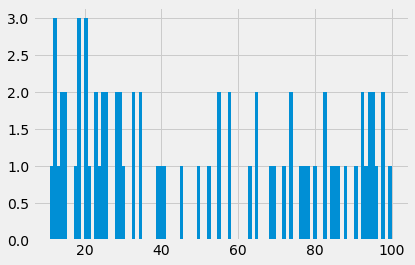

In [38]:
b_df[(b_df['artist.inverted'] == 'Jay-Z')]['rank'].hist(bins=100)

Object `days` not found.


<AxesSubplot:xlabel='date', ylabel='rank'>

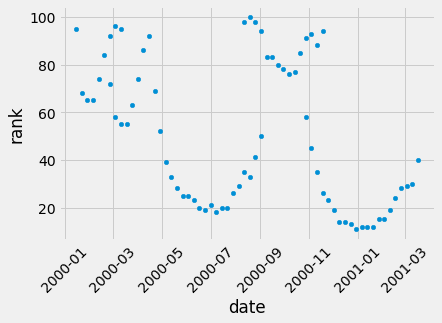

In [63]:
Scatterplot of JayZ at different songs/days?
b_df[(b_df['artist.inverted'] == 'Jay-Z')].plot.scatter(y='rank', 
                                                        x='date',
                                                        rot=45)

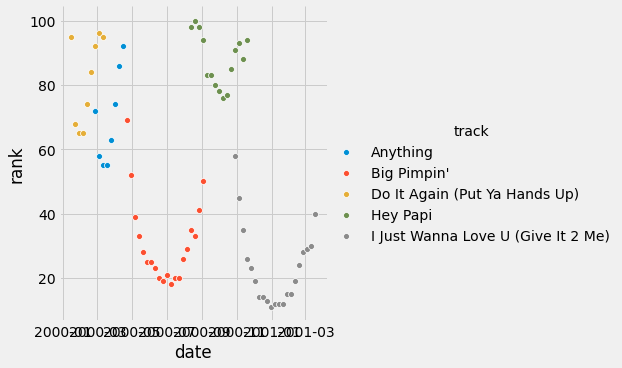

In [65]:
import seaborn as sns
g = sns.pairplot(x_vars=["date"], 
             y_vars=["rank"], 
             data=b_df[(b_df['artist.inverted'] == 'Jay-Z')], 
             hue="track",
             height=5)

# # Hacky roration?? -- https://github.com/mwaskom/seaborn/issues/867
# for ax in g.axes.flat:
#     for label in ax.get_xticklabels():
#         label.set_rotation(45)

# # Invert..
# for ax in g.axes.flat:
#     ax.invert_yaxis()

In [39]:
# Or we can get the list of top ranked songs...
b_df[(b_df['rank'] == 1.0)].groupby(['artist.inverted']).count()

,year,track,time,genre,week,rank,date
artist.inverted,,,,,,,
Aaliyah,1,1,1,1,1,1,1
"Aguilera, Christina",6,6,6,6,6,6,6
"Carey, Mariah",1,1,1,1,1,1,1
Creed,1,1,1,1,1,1,1
Destiny's Child,14,14,14,14,14,14,14
"Iglesias, Enrique",3,3,3,3,3,3,3
Janet,3,3,3,3,3,3,3
Lonestar,2,2,2,2,2,2,2
Madonna,4,4,4,4,4,4,4
